Model to Predict Sale price of house.

A Leading Real Estate MNC has noticed an increase in the market competition in terms of models predicting Sale Price of house. To stay aheard of the Market, The organisation has decided to engage the services of our company to create a Model for predicting Sale Price of house. They have identified a significant list of Predictors / Independent variables (80) that could impact the Sale Price and have asked to do the following
a) Exploratory Data Analysis
b) Different ways to Pick the right features / dimensions as all 80 features might not influence the Target label.
c) Create a Model with the best possible score.

In [1]:
# Import the required Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# #Load the CSV (Input data) file and browse few records
house_df = pd.read_csv('train.csv')
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Exploratory Data Analysis begins

In [3]:
# Checking type of df object - Should be a Pandas DataFrame
type(house_df)

pandas.core.frame.DataFrame

In [4]:
#Using describe nethod to check the statistical values of the columns
house_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# checking for Number of Rows and columns using shape attribute of Pandas
print('No. of Rows:',house_df.shape[0])
print('No. of Columns',house_df.shape[1])

No. of Rows: 1460
No. of Columns 81


In [6]:
#Using info method to get the information on the dataframe including the index data type and columns, non-null values and memory usage.
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
# # Checking for any null values in the dataset
null_counts = house_df.isnull().sum()
null_counts
null_counts[null_counts > 0]

LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [8]:
# columns with missing values
columns_with_missing_values = house_df.columns[house_df.isnull().any()]
columns_with_missing_values

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

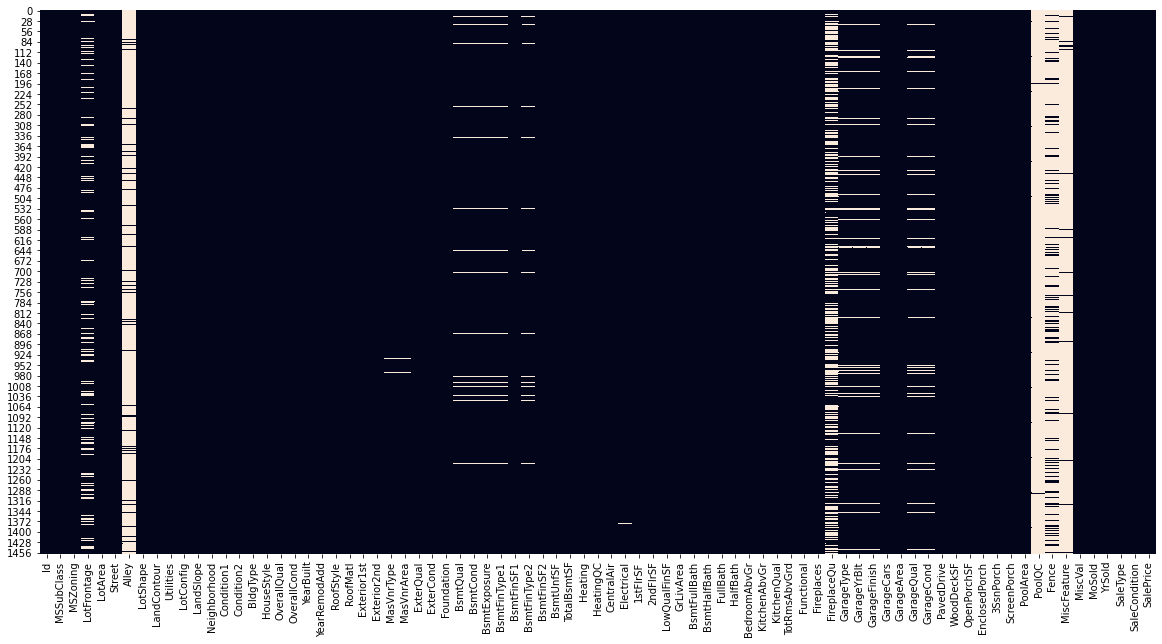

In [9]:
# plotting heatmap to see percentage of null values
plt.figure(figsize=(20, 10))
sns.heatmap(house_df.isnull(), cbar=False)
plt.show()

Here, we see that a large amount of data is missing.

But, while reading the description of the dataset, we come to know that data points are not missing, but it means that particular feature is not present in that house.

Thus, we will replace the null value, as per the given description of the dataset. 

<<<--- Replacement of Null values based on Data analysis & dataset description--->>>

In [10]:
# Replacing missing values with 'No Access' in Alley variable
house_df['Alley'].fillna('No Alley Access', inplace=True)
					
# Replacing all NA values with their original meaning
house_df['BsmtQual'].fillna('No Basement', inplace=True)
house_df['BsmtCond'].fillna('No Basement', inplace=True)
house_df['BsmtExposure'].fillna('No Basement', inplace=True)
house_df['BsmtFinType1'].fillna('No Basement', inplace=True)
house_df['BsmtFinType2'].fillna('No Basement', inplace=True)

					
# For observations where GarageType is null, we replace with original meaning from data
house_df['GarageType'].fillna('No Garage', inplace=True)
house_df['GarageFinish'].fillna('No Garage', inplace=True)
house_df['GarageQual'].fillna('No Garage', inplace=True)
house_df['GarageCond'].fillna('No Garage', inplace=True)
house_df['PoolQC'].fillna('No Pool', inplace=True)
house_df['Fence'].fillna('No Fence', inplace=True)
house_df['MiscFeature'].fillna('None', inplace=True)
house_df['FireplaceQu'].fillna('No Fireplace', inplace=True)


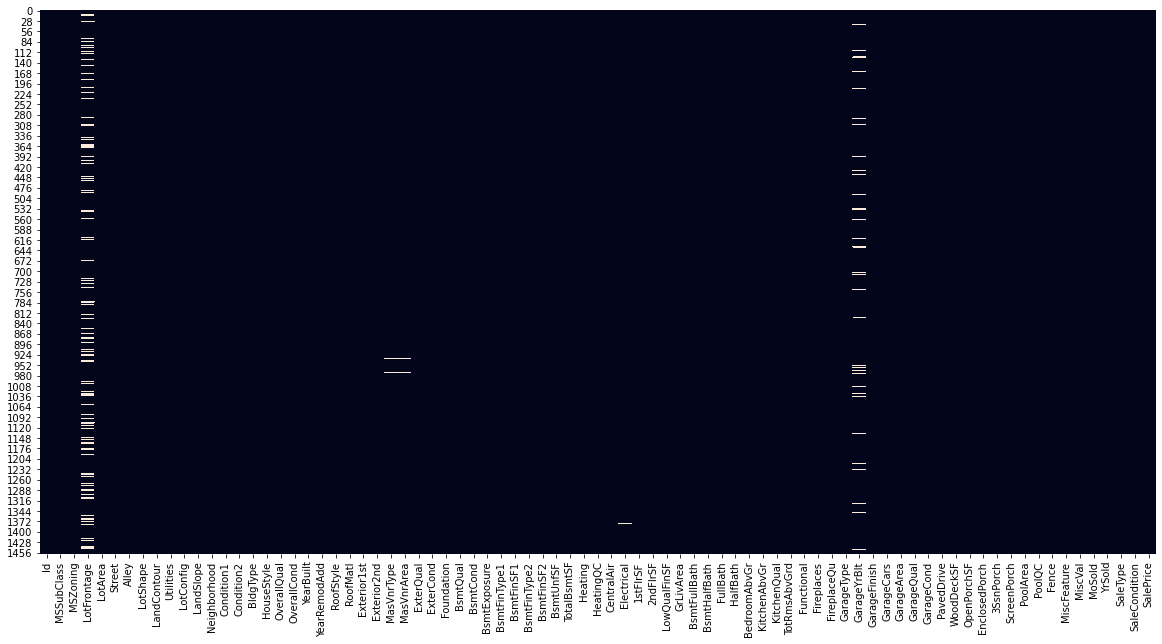

In [11]:
# plotting heatmap to see percentage of null values
plt.figure(figsize=(20, 10))
sns.heatmap(house_df.isnull(), cbar=False)
plt.show()

In [12]:
house_df['GarageYrBlt'].value_counts()

2005.0    65
2006.0    59
2004.0    53
2003.0    50
2007.0    49
          ..
1906.0     1
1908.0     1
1933.0     1
1900.0     1
1927.0     1
Name: GarageYrBlt, Length: 97, dtype: int64

In [13]:
# Fiiling Garage Year built with 0 for null values
house_df['GarageYrBlt'].fillna(0, inplace=True)

In [14]:
house_df['LotFrontage'].describe()
house_df['LotFrontage'].median()
house_df['LotFrontage'].mode()

0    60.0
dtype: float64

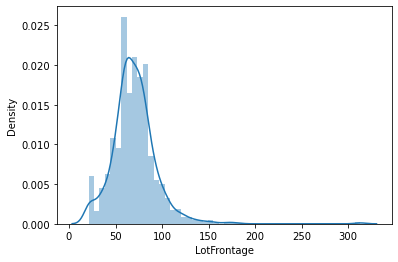

In [15]:
sns.distplot(house_df['LotFrontage'])
plt.show()

In [16]:
# Filling in the missing values in LotFrontage with its median value as the plot above is right skewed
house_df['LotFrontage'].fillna(house_df['LotFrontage'].median(), inplace=True)

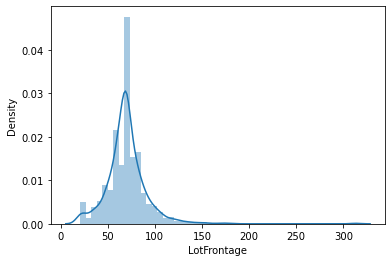

In [17]:
sns.distplot(house_df['LotFrontage'])
plt.show()

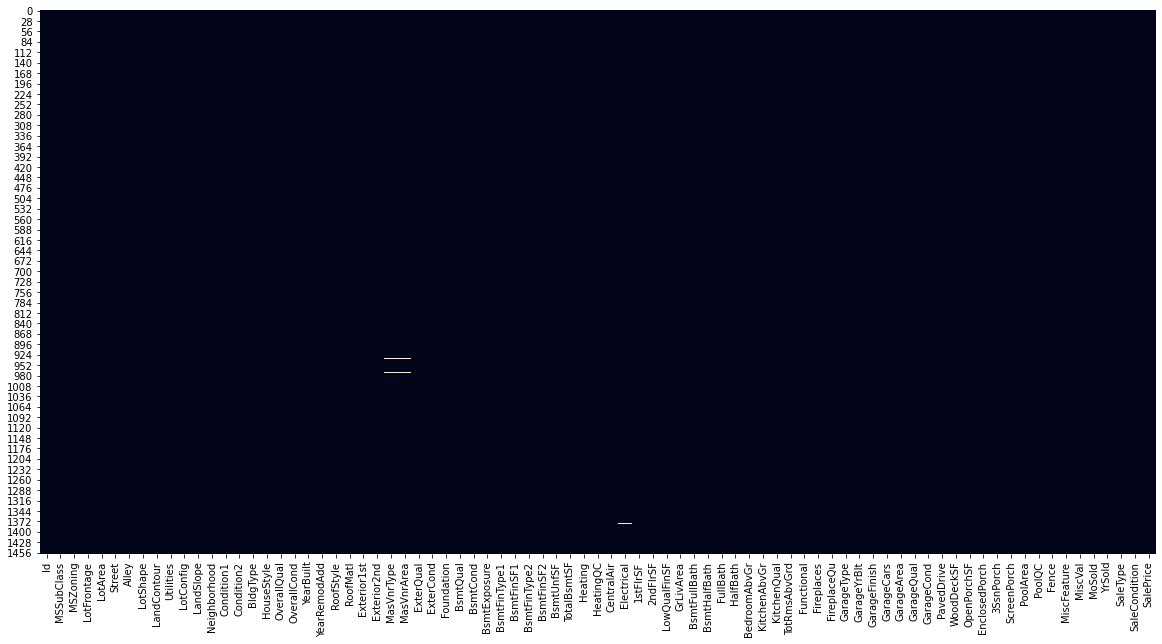

In [18]:
# plotting heatmap to see percentage of null values
plt.figure(figsize=(20, 10))
sns.heatmap(house_df.isnull(), cbar=False)
plt.show()

In [19]:
# Filling in the missing values for MasVnrType and MasVnrArea with None and 0 respectively as there are only 8 missing values out of total 1460
house_df['MasVnrType'].fillna('None', inplace=True)
house_df['MasVnrArea'].fillna(0, inplace=True)

In [20]:
null_counts = house_df.isnull().sum()
null_counts
null_counts[null_counts > 0]

Electrical    1
dtype: int64

In [21]:
house_df.Electrical.value_counts()

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
# Since there is only 1 missing Electrical value and the bulk of the records are having the value "SBrkr", updating with this value
house_df['Electrical'].fillna('SBrkr', inplace=True)

In [23]:
null_counts = house_df.isnull().sum()
null_counts
null_counts[null_counts > 0]

Series([], dtype: int64)

In [24]:
# Again, checking for the null values
house_df.isna().sum().sum()

0

As, there are no null values now, we can proceed further with our data.

<<<--- Null values handling completed--->>>

Changing Datatypes of Categorical variables to object type

In [25]:
# changing the datatype to object for the below categorical variables
house_df['OverallQual'] = house_df['OverallQual'].astype(object)
house_df['OverallCond'] = house_df['OverallCond'].astype(object)
house_df['MSSubClass'] = house_df['MSSubClass'].astype(object)

In [26]:
# dropping the ID column
house_df = house_df.drop('Id',1)

In [27]:
# creating dataframe of numerical columns
num_df = house_df.select_dtypes(exclude=['object'])

In [28]:
num_df.shape # 34 numerical column

(1460, 34)

In [29]:
num_df.columns

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [30]:
# creating datafrane of categorical columns
cat_df = house_df.select_dtypes('object')

In [31]:
cat_df.shape #46 categorical column

(1460, 46)

In [32]:
cat_df.columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

<<< ---- EDA Visulaization , Data rescaling begins ---->>

Now, we will see the relationship between the target variable, i.e.'SalePrice' and numerical independent variables

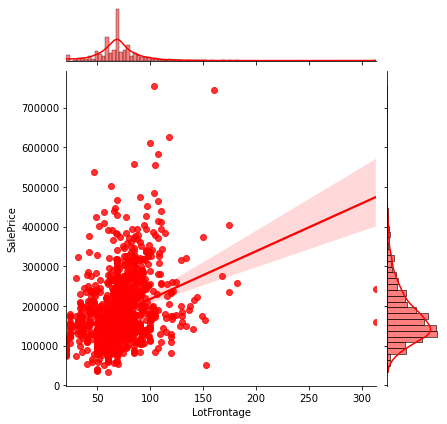

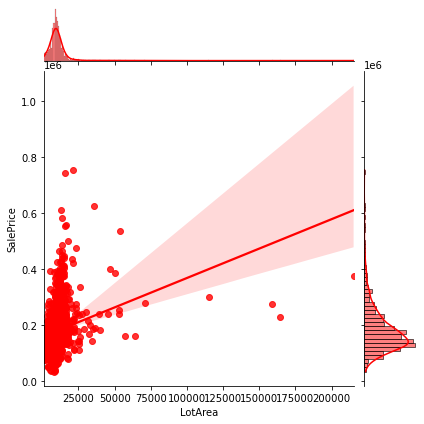

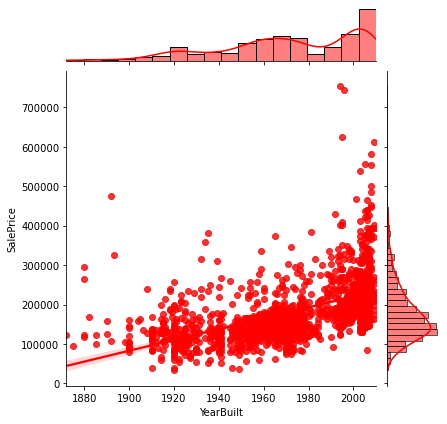

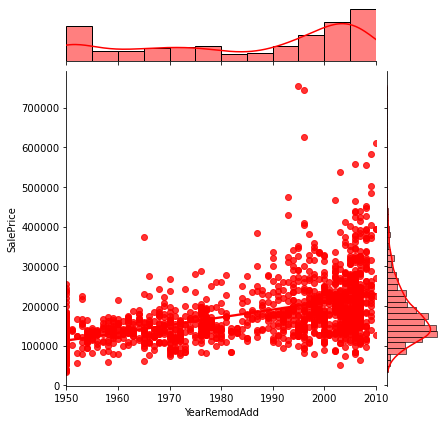

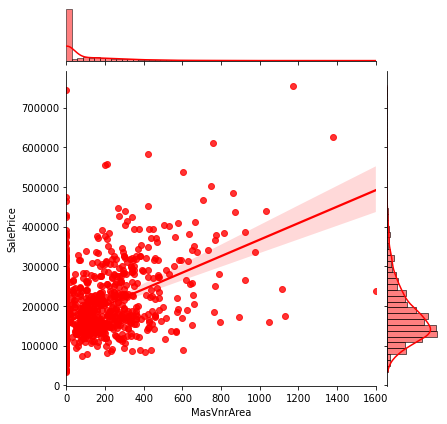

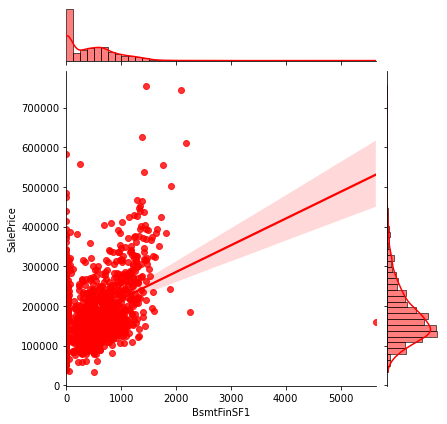

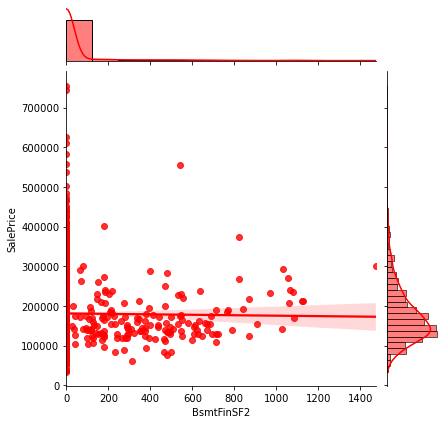

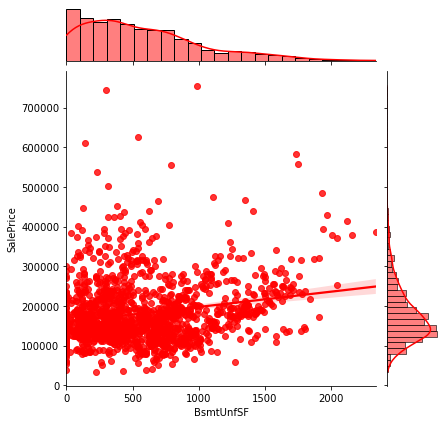

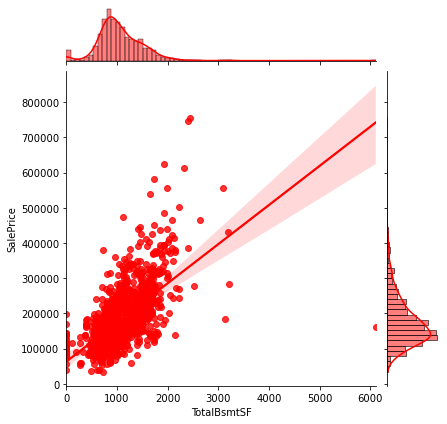

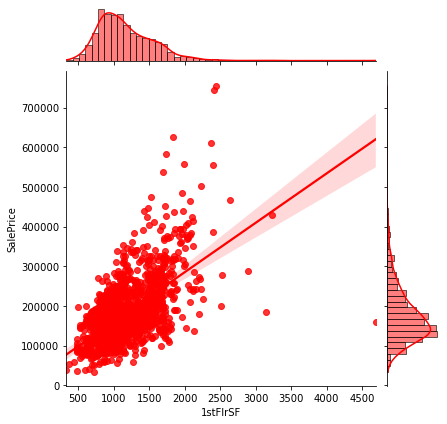

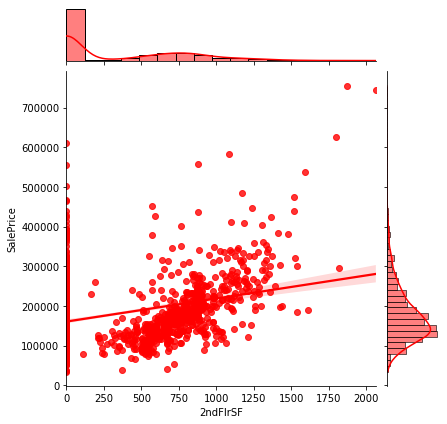

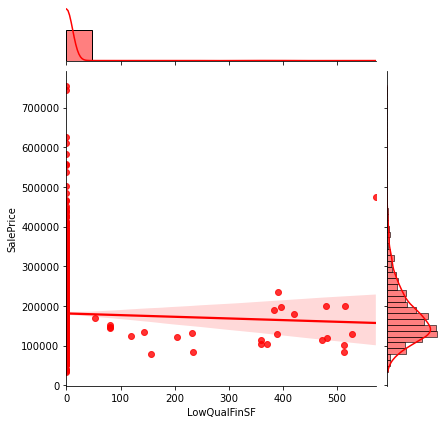

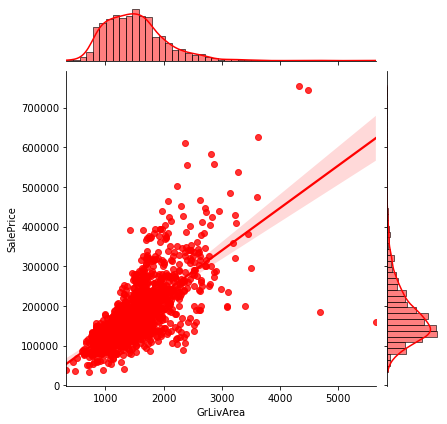

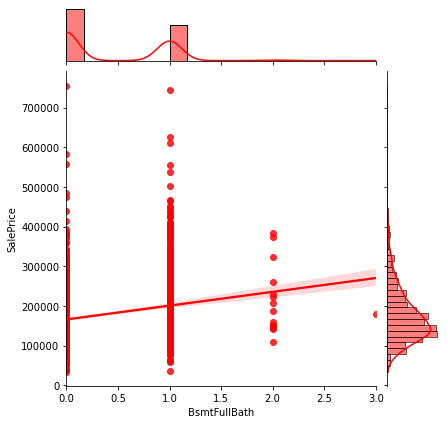

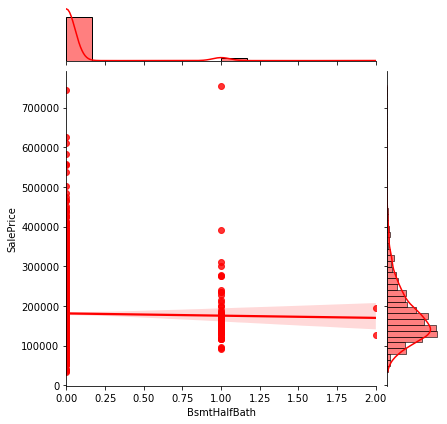

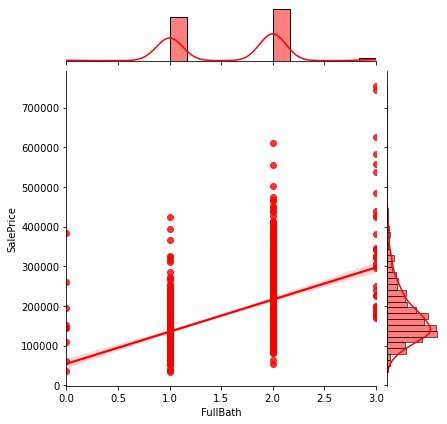

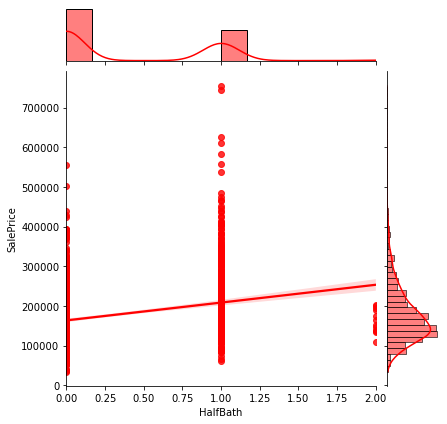

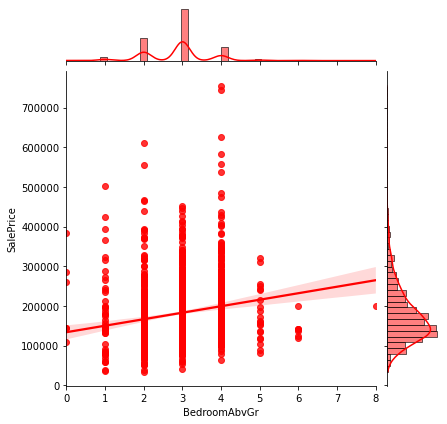

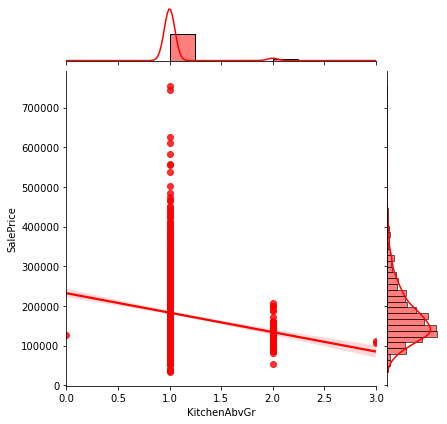

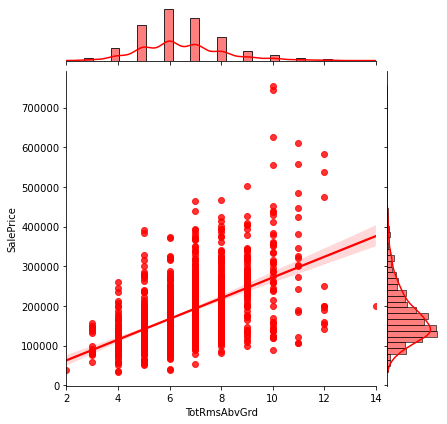

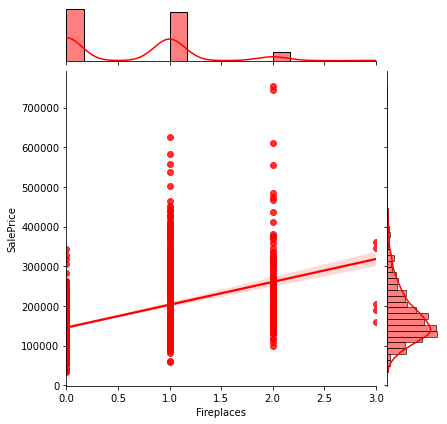

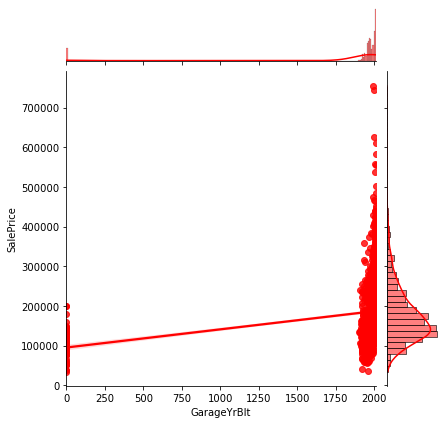

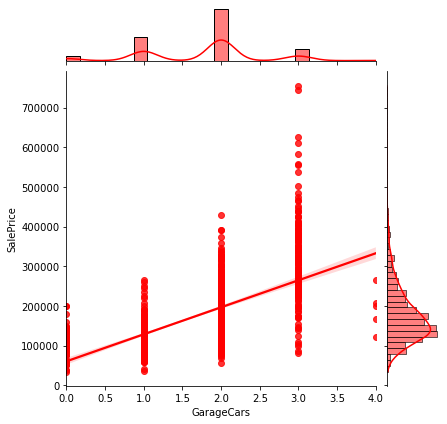

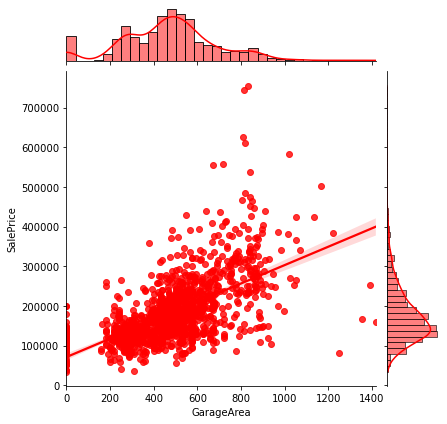

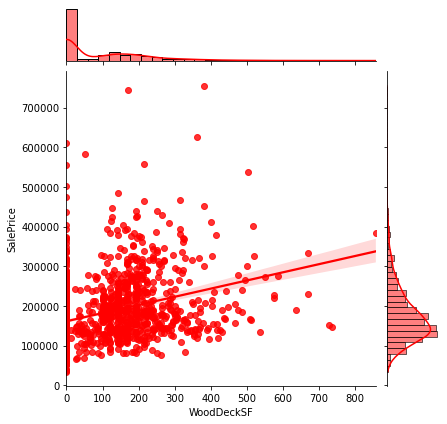

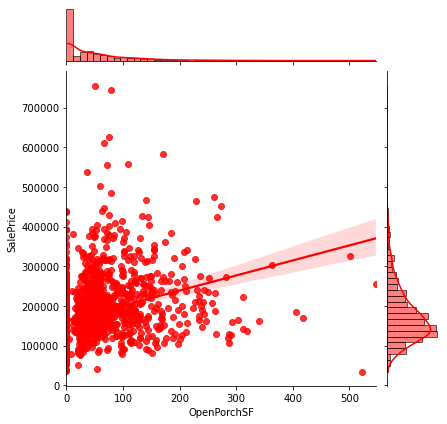

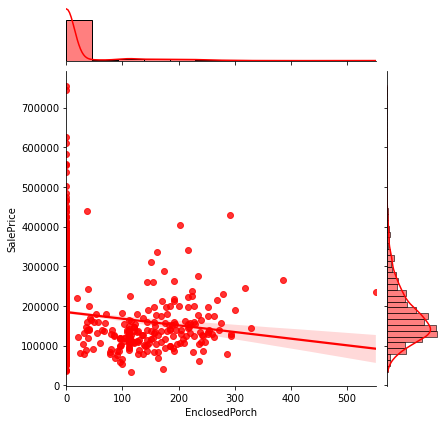

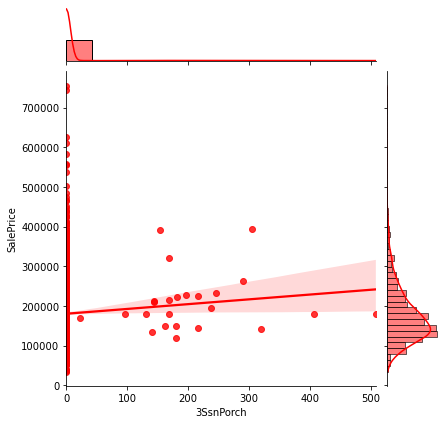

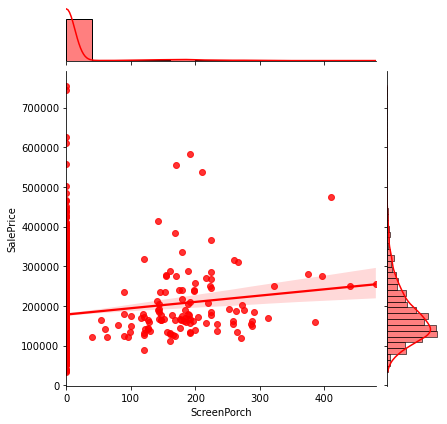

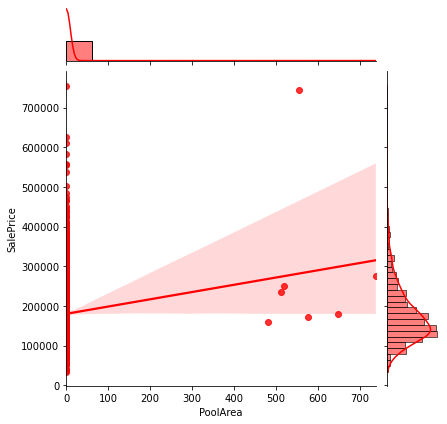

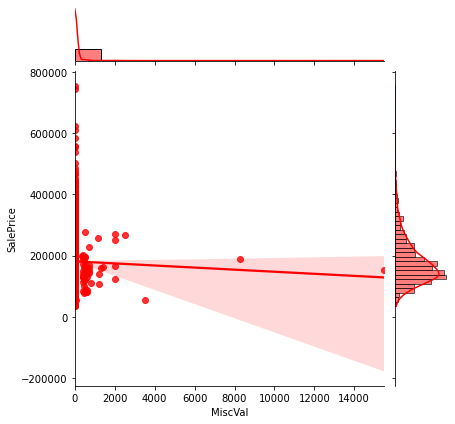

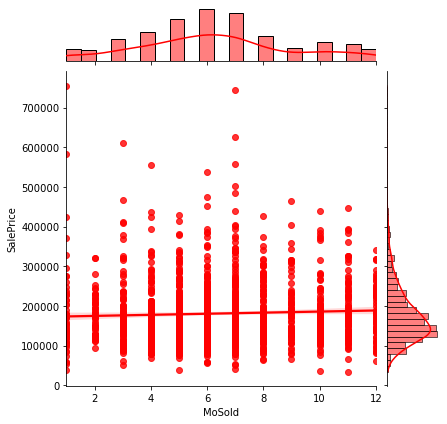

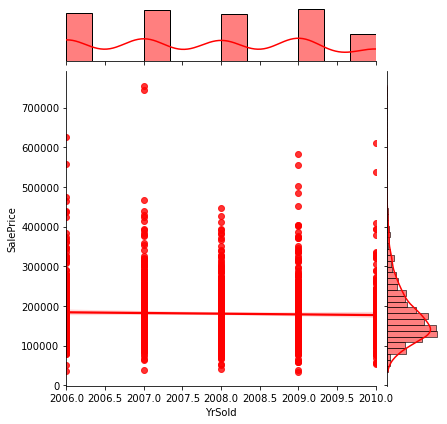

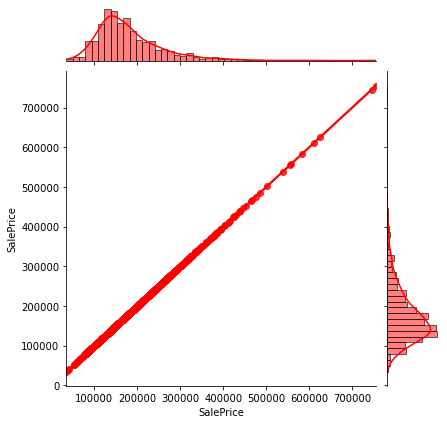

In [33]:
for i in num_df.columns:
    sns.jointplot(x=i, y='SalePrice', data=num_df, kind='reg', color='r')
    plt.show()

From, the above plots, we can see that as area increases or the newer the house is, higher the sale price.

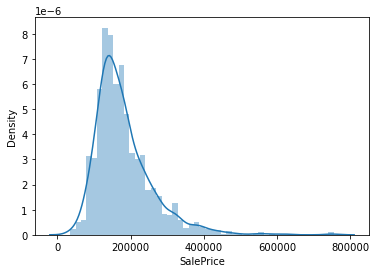

In [34]:
# Looking at the distribution of the SalePrice
sns.distplot(num_df.SalePrice);

We, can see that the data is highly right skewed. Thus, doing the log Transformation.

In [35]:
#train['Skewed_SP'] = np.log(train['SalePrice']+1)

house_final = house_df.copy()
house_final.SalePrice = house_final.SalePrice.transform(lambda X: np.log(X))

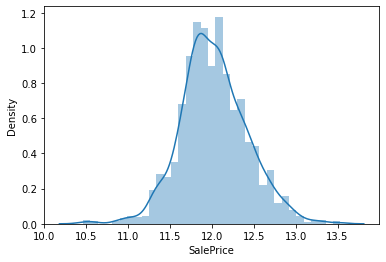

In [36]:
# Looking at the distribution of the SalePrice
sns.distplot(house_final.SalePrice);

After log transformation, we see that data has almost become normally distributed.

Visualization of Categorical Variables begins

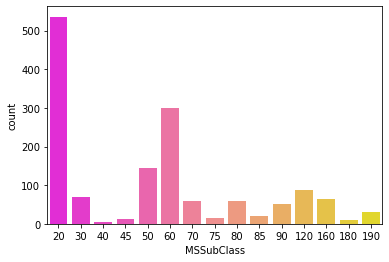

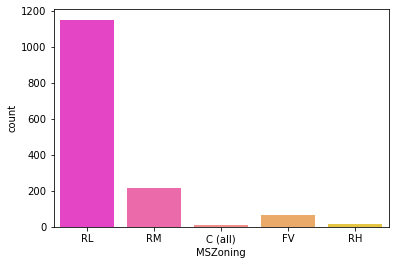

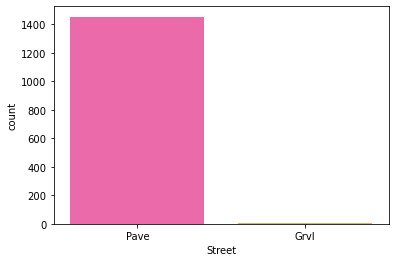

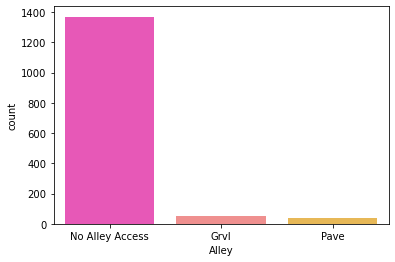

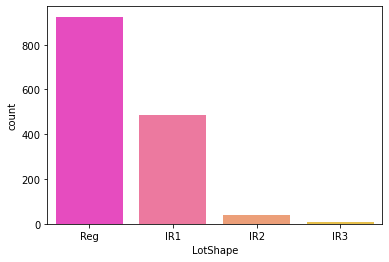

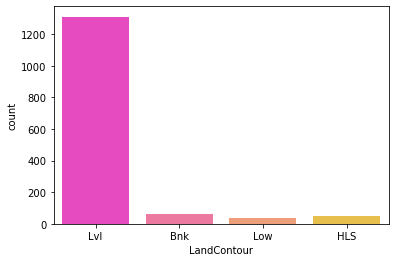

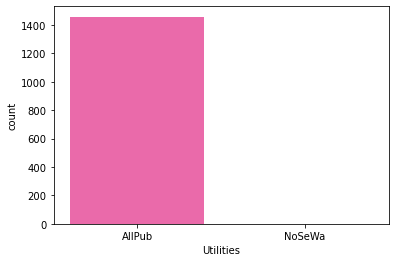

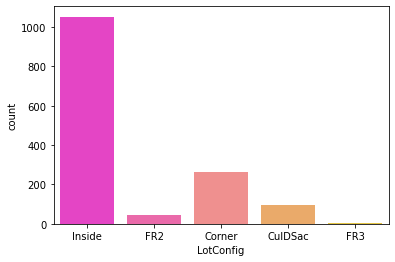

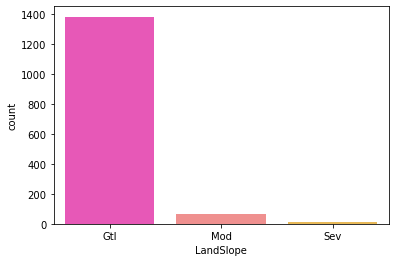

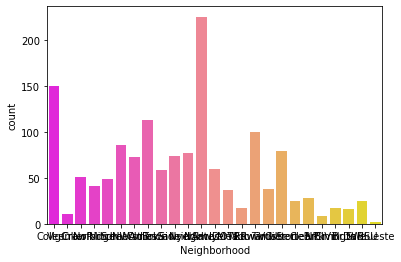

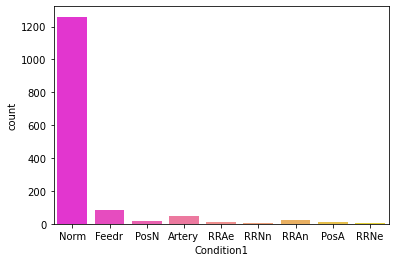

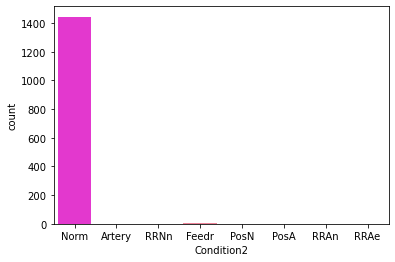

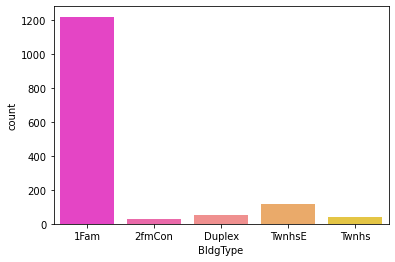

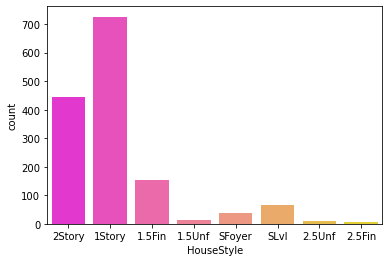

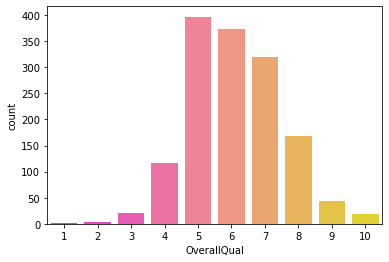

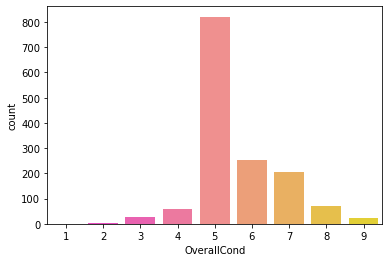

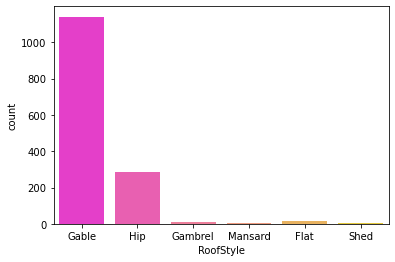

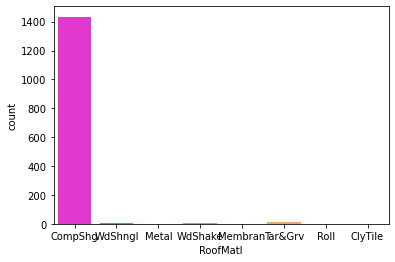

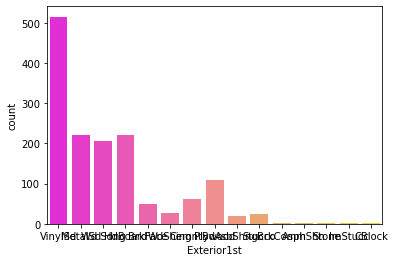

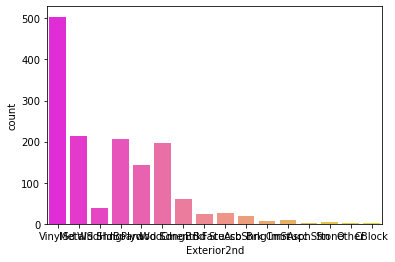

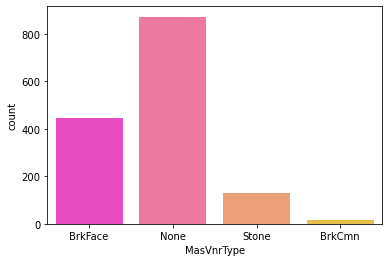

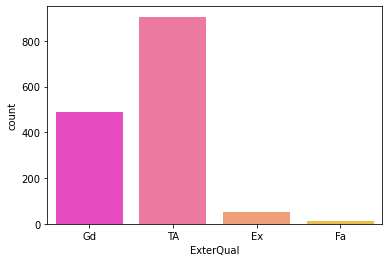

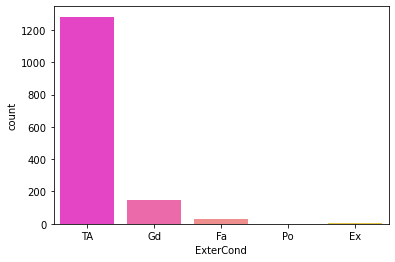

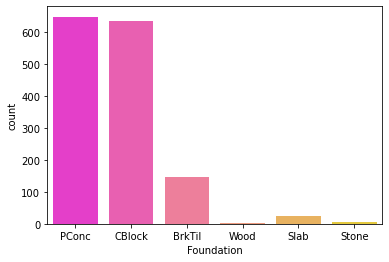

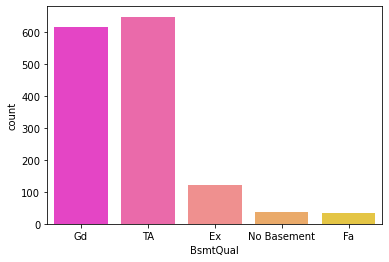

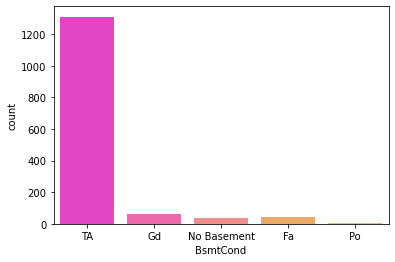

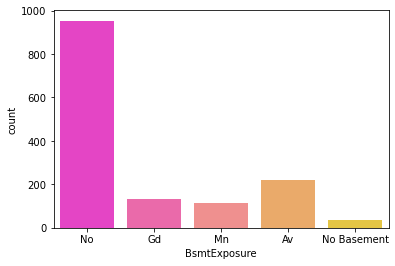

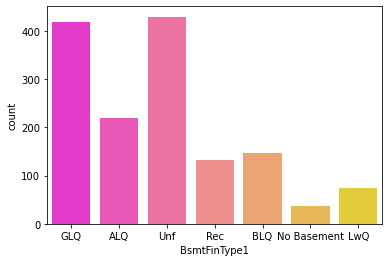

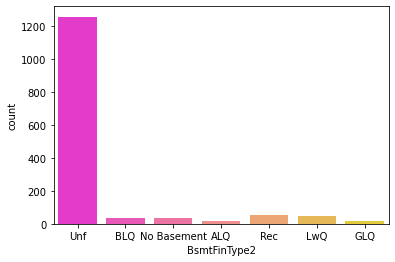

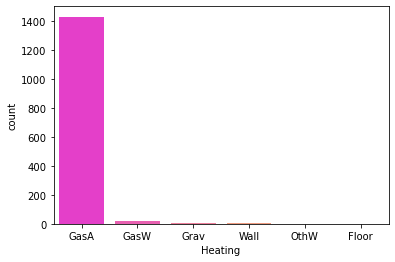

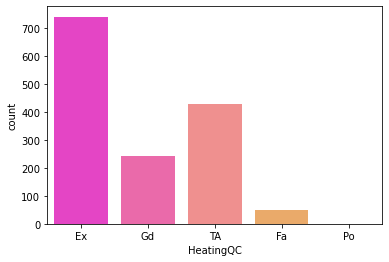

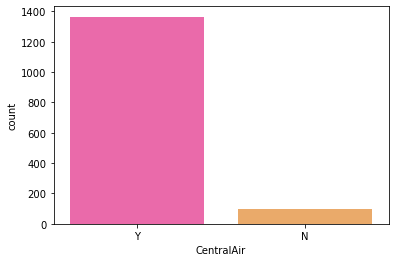

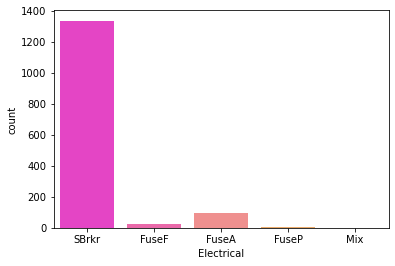

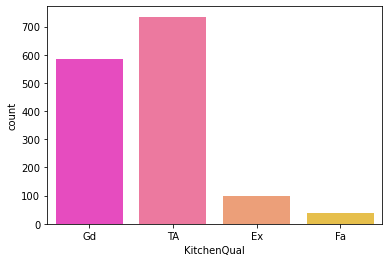

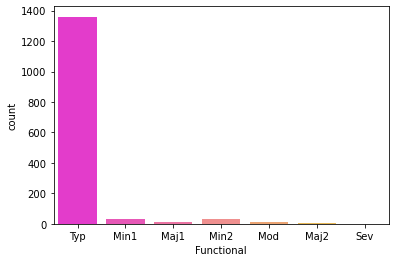

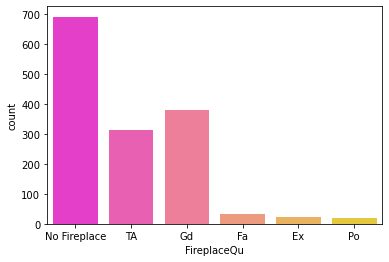

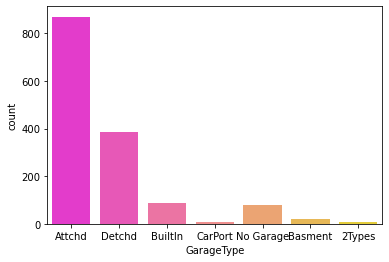

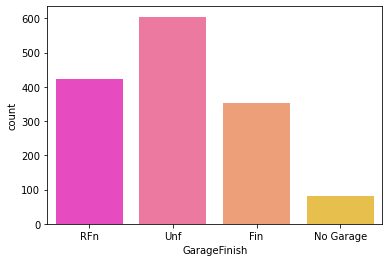

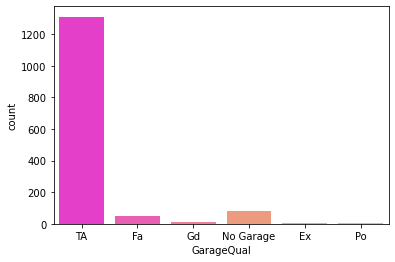

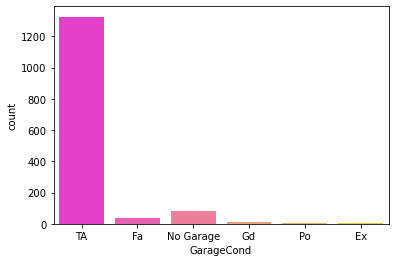

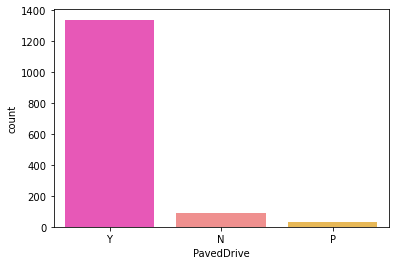

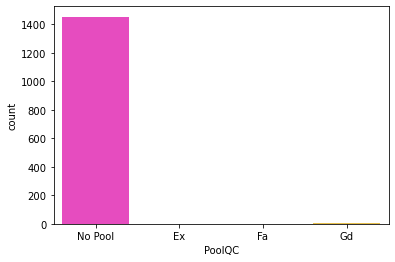

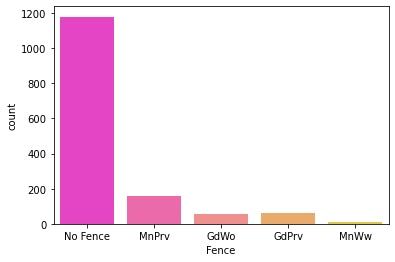

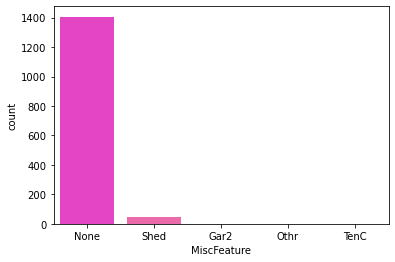

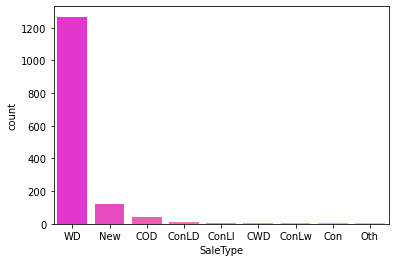

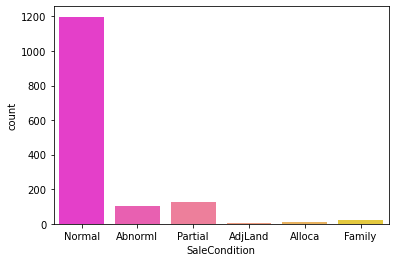

In [37]:
for i in cat_df:
    sns.countplot(x=i, data=cat_df, palette='spring')
    plt.show()

<<< ---- EDA Visulaization , Data rescaling Ends ---->>

<<< ---- Model work Begins ---->>

Performing Label Encoding for Categorical Variables

In [38]:
# Performing label encoding for categorical type features

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
encode_cols = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

for i in encode_cols:
    house_final[i] = le.fit_transform(house_final[i])


In [39]:
house_final.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5,3,65.0,8450,1,1,3,3,0,4,...,0,3,4,1,0,2,2008,8,4,12.247694
1,0,3,80.0,9600,1,1,3,3,0,2,...,0,3,4,1,0,5,2007,8,4,12.109011
2,5,3,68.0,11250,1,1,0,3,0,4,...,0,3,4,1,0,9,2008,8,4,12.317167
3,6,3,60.0,9550,1,1,0,3,0,0,...,0,3,4,1,0,2,2006,8,0,11.849398
4,5,3,84.0,14260,1,1,0,3,0,2,...,0,3,4,1,0,12,2008,8,4,12.429216


In [40]:
Predictor_colnames = house_final.columns[:-1]
Predictor_colnames

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo


Standardization - By converting a raw score to a z- score, we are expressing that score on a z-score scale, which always has a mean of 0 and a standard deviation of 1. In short, we are re-defining each raw score in terms of how far away it is from the group mean. 

In [42]:
## Standardizining the data
from scipy.stats import zscore
house_final_scaled = house_final.drop('SalePrice',1).apply(zscore)
#print(house_final_scaled)
house_final_scaled['SalePrice'] = house_final['SalePrice']
house_final_scaled.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,0.200350,-0.045532,-0.220875,-0.207142,0.064238,0.024699,0.750731,0.314667,-0.02618,0.604670,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,0.138777,0.313867,0.208502,12.247694
1,-1.001421,-0.045532,0.460320,-0.091886,0.064238,0.024699,0.750731,0.314667,-0.02618,-0.628316,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-0.489110,-0.614439,0.313867,0.208502,12.109011
2,0.200350,-0.045532,-0.084636,0.073480,0.064238,0.024699,-1.378933,0.314667,-0.02618,0.604670,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,0.990891,0.138777,0.313867,0.208502,12.317167
3,0.440704,-0.045532,-0.447940,-0.096897,0.064238,0.024699,-1.378933,0.314667,-0.02618,-1.861302,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,-1.599111,-1.367655,0.313867,-3.426284,11.849398
4,0.200350,-0.045532,0.641972,0.375148,0.064238,0.024699,-1.378933,0.314667,-0.02618,-0.628316,...,-0.068692,0.063305,0.457447,-0.185975,-0.087688,2.100892,0.138777,0.313867,0.208502,12.429216


<<<--- Feature / Dimensionality Selection / Extraction begins--->>>

Method 1 - Principal Component Analysis (PCA) is a common feature extraction method in data science. Technically, PCA finds the eigenvectors of a covariance matrix with the highest eigenvalues and then uses those to project the data into a new subspace of equal or less dimensions.

In [43]:
"""
n_components = .90 means that scikit-learn will choose the minimum number 
of principal components such that 90% of the variance is retained.
"""
y = house_final_scaled.SalePrice
X = house_final_scaled.drop('SalePrice', axis=1)
pca = PCA(n_components = .90)
# Fit PCA on training set only
pca.fit(X)
#print (y)
# Apply the mapping (transform) to the dataset 
X = pca.transform(X)

print('Number of dimensions before PCA: ' + str(len(Predictor_colnames)))
print('Number of dimensions after PCA: ' + str(pca.n_components_))


Number of dimensions before PCA: 79
Number of dimensions after PCA: 51


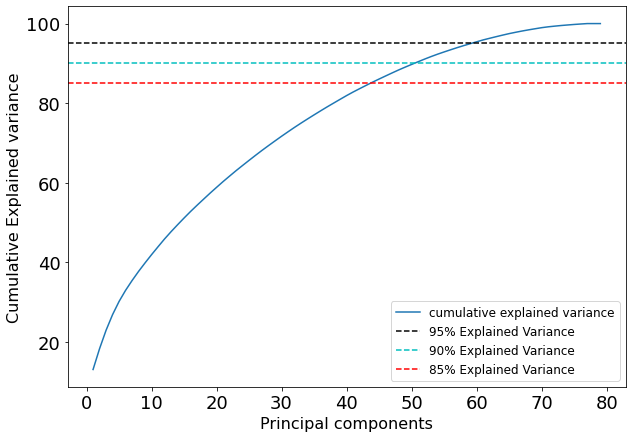

In [44]:
# if n_components is not set, all components are kept (79 in this case)
pca = PCA()

pca.fit(house_final_scaled.drop('SalePrice', axis=1))

# Summing explained variance
tot = sum(pca.explained_variance_)

var_exp = [(i/tot)*100 for i in sorted(pca.explained_variance_, reverse=True)] 

# Cumulative explained variance
cum_var_exp = np.cumsum(var_exp)

# PLOT OUT THE EXPLAINED VARIANCES SUPERIMPOSED 
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (10,7));
ax.tick_params(labelsize = 18)
ax.plot(range(1, 80), cum_var_exp, label='cumulative explained variance')
ax.set_ylabel('Cumulative Explained variance', fontsize = 16)
ax.set_xlabel('Principal components', fontsize = 16)
ax.axhline(y = 95, color='k', linestyle='--', label = '95% Explained Variance')
ax.axhline(y = 90, color='c', linestyle='--', label = '90% Explained Variance')
ax.axhline(y = 85, color='r', linestyle='--', label = '85% Explained Variance')
ax.legend(loc='best', markerscale = 1.0, fontsize = 12)

Method 2 - Find the correlation of the Target label against the predictors and select only those with a high cprrelation (I have used > 20% in the code below)

In [45]:
house_final_scaled.shape

(1460, 80)

In [46]:
y = house_final_scaled.SalePrice
X = house_final_scaled.drop('SalePrice', axis=1)


<AxesSubplot:>

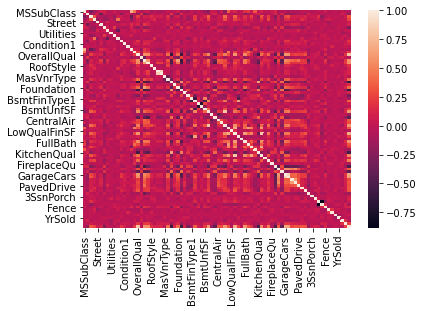

In [47]:
corr = house_final_scaled.corr()
sns.heatmap(corr)

In [48]:
house_final_scaled.corr()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
MSSubClass,1.000000,0.037785,-0.308683,-0.132505,-0.025737,0.073545,0.090920,-0.007658,-0.026217,0.060625,...,0.020837,-0.015024,0.074567,-0.045944,-0.006062,0.007052,-0.022100,0.020195,-0.033097,-0.035486
MSZoning,0.037785,1.000000,-0.105961,-0.034452,0.087654,-0.368086,0.061887,-0.017854,-0.001192,-0.009895,...,-0.003128,0.002882,-0.061289,-0.005553,0.009293,-0.031496,-0.020628,0.097437,0.009494,-0.188860
LotFrontage,-0.308683,-0.105961,1.000000,0.304522,-0.037349,-0.065084,-0.138877,-0.076080,-0.001027,-0.177821,...,0.180819,-0.191902,-0.036421,0.008677,-0.000255,0.010451,0.006380,-0.031412,0.058857,0.335292
LotArea,-0.132505,-0.034452,0.304522,1.000000,-0.197131,-0.029676,-0.165315,-0.149083,0.010123,-0.121161,...,0.077672,-0.065167,0.036031,0.106135,0.038068,0.001205,-0.014261,0.012292,0.034169,0.257320
Street,-0.025737,0.087654,-0.037349,-0.197131,1.000000,-0.001587,-0.010224,0.115995,0.001682,0.013960,...,0.004413,-0.004067,-0.029386,-0.160748,-0.022733,0.003690,-0.025043,0.014339,0.006064,0.057369
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MoSold,0.007052,-0.031496,0.010451,0.001205,0.003690,-0.011274,-0.033455,-0.011599,-0.051552,0.018902,...,-0.033737,0.036368,-0.009892,0.013957,-0.006495,1.000000,-0.145721,-0.047386,0.013320,0.057329
YrSold,-0.022100,-0.020628,0.006380,-0.014261,-0.025043,0.015176,0.036449,0.020507,0.023353,-0.005992,...,-0.059689,0.060904,-0.035366,0.057708,0.004906,-0.145721,1.000000,-0.002327,0.003880,-0.037263
SaleType,0.020195,0.097437,-0.031412,0.012292,0.014339,0.001092,-0.000911,-0.025754,-0.126770,0.014325,...,0.011009,-0.013592,-0.006154,-0.003340,0.015773,-0.047386,-0.002327,1.000000,0.184067,-0.036747
SaleCondition,-0.033097,0.009494,0.058857,0.034169,0.006064,-0.000162,-0.038118,0.033809,-0.089701,0.051579,...,-0.067251,0.097425,0.100675,-0.008074,0.013027,0.013320,0.003880,0.184067,1.000000,0.248819


In [49]:
# Check correlation of features with Target Variable
corr1 = house_final_scaled.corr()['SalePrice'].sort_values()
corr1[np.abs(corr1) > 0.2]

ExterQual       -0.582163
BsmtQual        -0.576968
KitchenQual     -0.534386
GarageType      -0.503130
HeatingQC       -0.425906
GarageFinish    -0.417404
BsmtExposure    -0.303826
LotShape        -0.278091
Neighborhood     0.201685
BedroomAbvGr     0.209044
HouseStyle       0.214717
BsmtUnfSF        0.221985
BsmtFullBath     0.236224
SaleCondition    0.248819
LotArea          0.257320
GarageQual       0.275692
Electrical       0.294400
PavedDrive       0.304688
HalfBath         0.313982
2ndFlrSF         0.319300
OpenPorchSF      0.321053
GarageCond       0.323691
WoodDeckSF       0.334135
LotFrontage      0.335292
GarageYrBlt      0.349014
CentralAir       0.351600
BsmtFinSF1       0.372023
Foundation       0.412083
MasVnrArea       0.426775
Fireplaces       0.489449
TotRmsAbvGrd     0.534422
YearRemodAdd     0.565608
YearBuilt        0.586570
FullBath         0.594771
1stFlrSF         0.596981
TotalBsmtSF      0.612134
GarageArea       0.650888
GarageCars       0.680625
GrLivArea   

Method 3 - Finding the multicollinearity between Independent variables / Predictors using VIF. A high VIF is indicative of multicollinearity. VIF is a direct measure of how much the variance of the coefficient (ie. its standard error) is being inflated due to multicollinearity. VIF > 5 indicate a very strong multicollinearity

In [50]:
# Checking for multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

pd.DataFrame({'vif':vif}, index=X.columns)

,vif
MSSubClass,5.877637
MSZoning,1.508787
LotFrontage,1.758253
LotArea,1.639578
Street,1.183140
...,...
MiscVal,1.113369
MoSold,1.077520
YrSold,1.096966
SaleType,1.163168


Method 4 - Demonstrating Forward Feature selection Technique

In [51]:
## Flag intermediate output

#show_steps = True   # for testing/debugging
show_steps = False  # without showing steps

In [52]:
# Use Forward Feature Selection to pick a good model

# start with no predictors
included = []
# keep track of model and parameters
best = {'feature': '', 'r2': 0, 'a_r2': 0}
# create a model object to hold the modelling parameters
model = LinearRegression()
# get the number of cases in the training data
n = X.shape[0]

while True:
    changed = False
    
    if show_steps:
        print('') 

    # list the features to be evaluated
    excluded = list(set(X.columns) - set(included))
    
    if show_steps:
        print('(Step) Excluded = %s' % ', '.join(excluded))  

    # for each remaining feature to be evaluated
    for new_column in excluded:
        
        if show_steps:
            print('(Step) Trying %s...' % new_column)
            print('(Step) - Features = %s' % ', '.join(included + [new_column]))

        # fit the model with the data
        fit = model.fit(X[included + [new_column]], y)
        # calculate the score (R^2 for Regression)
        r2 = fit.score(X[included + [new_column]], y)
        # number of predictors in this model
        k = len(included + [new_column])
        # calculate the adjusted R^2
        adjusted_r2 = 1 - ( ( (1 - r2) * (n - 1) ) / (n - k - 1) )

        if show_steps:
            print('(Step) - Adjusted R^2: This = %.3f; Best = %.3f' % 
                  (adjusted_r2, best['a_r2']))

        # if model improves
        if adjusted_r2 > best['a_r2']:
            # record new parameters
            best = {'feature': new_column, 'r2': r2, 'a_r2': adjusted_r2}
            # flag that found a better model
            changed = True
            if show_steps:
                print('(Step) - New Best!   : Feature = %s; R^2 = %.3f; Adjusted R^2 = %.3f' % 
                      (best['feature'], best['r2'], best['a_r2']))
    # END for

    # if found a better model after testing all remaining features
    if changed:
        # update control details
        included.append(best['feature'])
        excluded = list(set(excluded) - set(best['feature']))
        print('Added feature %-4s with R^2 = %.3f and adjusted R^2 = %.3f' % 
              (best['feature'], best['r2'], best['a_r2']))
    else:
        # terminate if no better model
        print('*'*50)
        break

print('')
print('Resulting features:')
print(', '.join(included))

Added feature OverallQual with R^2 = 0.668 and adjusted R^2 = 0.668
Added feature GrLivArea with R^2 = 0.740 and adjusted R^2 = 0.740
Added feature YearBuilt with R^2 = 0.783 and adjusted R^2 = 0.782
Added feature OverallCond with R^2 = 0.804 and adjusted R^2 = 0.803
Added feature GarageCars with R^2 = 0.822 and adjusted R^2 = 0.821
Added feature TotalBsmtSF with R^2 = 0.837 and adjusted R^2 = 0.836
Added feature Fireplaces with R^2 = 0.845 and adjusted R^2 = 0.844
Added feature BsmtFullBath with R^2 = 0.851 and adjusted R^2 = 0.850
Added feature BldgType with R^2 = 0.856 and adjusted R^2 = 0.855
Added feature SaleCondition with R^2 = 0.860 and adjusted R^2 = 0.859
Added feature KitchenQual with R^2 = 0.861 and adjusted R^2 = 0.860
Added feature CentralAir with R^2 = 0.864 and adjusted R^2 = 0.863
Added feature LotArea with R^2 = 0.866 and adjusted R^2 = 0.864
Added feature ScreenPorch with R^2 = 0.867 and adjusted R^2 = 0.866
Added feature BsmtFinType1 with R^2 = 0.869 and adjusted R^

Method 5 - Backward Feature Elimination. Use statsmodels to fit the data and find the results. Check the p-Values and take only those p-values with a score < 0.05 i.e. it means the predictor impacts the Sale Price Target and the alternate hypotheses becomes true.

<<<--- I have used Method 5 in this model--->>>

In [53]:
y = house_final_scaled.SalePrice
X = house_final_scaled.drop('SalePrice', axis=1)
X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.887
Model:                            OLS   Adj. R-squared:                  0.881
Method:                 Least Squares   F-statistic:                     141.4
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:08:49   Log-Likelihood:                 862.53
No. Observations:                1460   AIC:                            -1569.
Df Residuals:                    1382   BIC:                            -1157.
Df Model:                          77                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
MSSubClass        0.0036      0.009      0.415      0.678      -0.014       0.021
MSZoning         -0.0084      0.004     -1.901      0.057      -0.017       0.000
LotFrontage      -0.0097      0.005     -2.034      0.042      -0.019      -0.000
LotArea           0.0162      0.005      3.517      0.000       0.007       0.025
Street            0.0109      0.004      2.777      0.006       0.003       0.019
Alley             0.0073      0.004      1.775      0.076      -0.001       0.015
LotShape         -0.0087      0.004     -2.162      0.031      -0.017      -0.001
LandContour       0.0075      0.004      1.808      0.071      -0.001       0.016
Utilities        -0.0047      0.004     -1.244      0.214      -0.012       0.003
LotConfig        -0.0026      0.004     -0.671      0.503      -0.010       0.005
LandSlope         0.0091      0.005      1.988      0.047       0.000       0.018
Neighborhood      0.0070      0.004      1.733      0.083      -0.001       0.015
Condition1        0.0007      0.004      0.176      0.860      -0.007       0.008
Condition2       -0.0112      0.004     -2.966      0.003      -0.019      -0.004
BldgType         -0.0264      0.008     -3.372      0.001      -0.042      -0.011
HouseStyle       -0.0121      0.006     -2.155      0.031      -0.023      -0.001
OverallQual       0.0942      0.007     13.170      0.000       0.080       0.108
OverallCond       0.0465      0.005      9.235      0.000       0.037       0.056
YearBuilt         0.0475      0.010      4.843      0.000       0.028       0.067
YearRemodAdd      0.0118      0.006      1.976      0.048    8.68e-05       0.024
RoofStyle         0.0047      0.004      1.146      0.252      -0.003       0.013
RoofMatl          0.0065      0.004      1.649      0.099      -0.001       0.014
Exterior1st      -0.0134      0.007     -1.845      0.065      -0.028       0.001
Exterior2nd       0.0130      0.007      1.796      0.073      -0.001       0.027
MasVnrType        0.0021      0.004      0.491      0.624      -0.006       0.010
MasVnrArea        0.0037      0.005      0.764      0.445      -0.006       0.013
ExterQual        -0.0046      0.006     -0.776      0.438      -0.016       0.007
ExterCond         0.0088      0.004      2.207      0.027       0.001       0.017
Foundation        0.0083      0.005      1.608      0.108      -0.002       0.019
BsmtQual         -0.0147      0.006     -2.562      0.011      -0.026      -0.003
BsmtCond          0.0053      0.004      1.315      0.189      -0.003       0.013
BsmtExposure     -0.0105      0.005     -2.309      0.021      -0.019      -0.002
BsmtFinType1     -0.0137      0.005     -2.702      0.007      -0.024      -0.004
BsmtFinSF1        0.0044      0.005      0.974      0.330      -0.004       0.013
BsmtFinType2      0.0088      0.005      1.615   

There are 39 variables having p-value less than 0.05, we will use only those features to build our model.

In [54]:
# significant features
rel_features = ['LotFrontage','LotArea','Street','LotShape','LandSlope','Condition2','BldgType','HouseStyle',
                'OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtExposure',
                'BsmtFinType1','BsmtFinSF2','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF',
                'GrLivArea','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'PoolQC','YrSold','SaleCondition']

In [55]:
y = house_final_scaled.SalePrice

X = house_final_scaled[['LotFrontage','LotArea','Street','LotShape','LandSlope','Condition2','BldgType','HouseStyle',
                'OverallQual','OverallCond','YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtExposure',
                'BsmtFinType1','BsmtFinSF2','TotalBsmtSF','HeatingQC','CentralAir','1stFlrSF','2ndFlrSF',
                'GrLivArea','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'PoolQC','YrSold','SaleCondition']]


X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     273.0
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:08:49   Log-Likelihood:                 830.81
No. Observations:                1460   AIC:                            -1582.
Df Residuals:                    1420   BIC:                            -1370.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotFrontage      -0.0086      0.005     -1.841      0.066      -0.018       0.001
LotArea           0.0164      0.005      3.613      0.000       0.008       0.025
Street            0.0107      0.004      2.810      0.005       0.003       0.018
LotShape         -0.0089      0.004     -2.281      0.023      -0.017      -0.001
LandSlope         0.0081      0.004      1.904      0.057      -0.000       0.016
Condition2       -0.0110      0.004     -2.989      0.003      -0.018      -0.004
BldgType         -0.0265      0.004     -6.038      0.000      -0.035      -0.018
HouseStyle       -0.0099      0.005     -2.059      0.040      -0.019      -0.000
OverallQual       0.1018      0.007     15.076      0.000       0.089       0.115
OverallCond       0.0445      0.005      9.075      0.000       0.035       0.054
YearBuilt         0.0630      0.008      7.489      0.000       0.047       0.080
YearRemodAdd      0.0136      0.006      2.382      0.017       0.002       0.025
ExterCond         0.0085      0.004      2.201      0.028       0.001       0.016
BsmtQual         -0.0146      0.005     -2.677      0.008      -0.025      -0.004
BsmtExposure     -0.0085      0.004     -1.952      0.051      -0.017    4.17e-05
BsmtFinType1     -0.0170      0.004     -3.812      0.000      -0.026      -0.008
BsmtFinSF2        0.0041      0.004      1.078      0.281      -0.003       0.012
TotalBsmtSF       0.0178      0.007      2.452      0.014       0.004       0.032
HeatingQC        -0.0140      0.004     -3.146      0.002      -0.023      -0.005
CentralAir        0.0196      0.004      4.482      0.000       0.011       0.028
1stFlrSF          0.0304      0.031      0.974      0.330      -0.031       0.092
2ndFlrSF          0.0185      0.035      0.530      0.596      -0.050       0.087
GrLivArea         0.0771      0.042      1.842      0.066      -0.005       0.159
BsmtFullBath      0.0259      0.005      5.689      0.000       0.017       0.035
FullBath          0.0138      0.006      2.437      0.015       0.003       0.025
KitchenQual      -0.0221      0.005     -4.631      0.000      -0.031      -0.013
TotRmsAbvGrd      0.0201      0.007      2.887      0.004       0.006       0.034
Functional        0.0178      0.004      4.503      0.000       0.010       0.026
Fireplaces        0.0232      0.005      5.100      0.000       0.014       0.032
GarageType       -0.0114      0.005     -2.348      0.019      -0.021      -0.002
GarageCars        0.0493      0.005      9.576      0.000       0.039       0.059
PavedDrive        0.0128      0.004      2.964      0.003       0.004       0.021
WoodDeckSF        0.0134      0.004      3.305      0.001       0.005       0.021
EnclosedPorch     0.0085      0.004      2.050      0.041       0.000       0.017
ScreenPorch       0.0198      0.004      5.161   

In [56]:
# Now, dropping insignificant features
rel_features = ['LotArea','Street','LotShape','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
                'YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC',
                'CentralAir','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'YrSold','SaleCondition']

In [57]:
y = house_final_scaled.SalePrice
X = house_final_scaled[['LotArea','Street','LotShape','Condition2','BldgType','HouseStyle','OverallQual','OverallCond',
                'YearBuilt','YearRemodAdd','ExterCond','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC',
                'CentralAir','BsmtFullBath','FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces',
                'GarageType','GarageCars','PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','PoolArea',
                'YrSold','SaleCondition']]
X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     306.5
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:08:49   Log-Likelihood:                 754.28
No. Observations:                1460   AIC:                            -1445.
Df Residuals:                    1428   BIC:                            -1275.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotArea           0.0251      0.004      5.785      0.000       0.017       0.034
Street            0.0107      0.004      2.713      0.007       0.003       0.019
LotShape         -0.0110      0.004     -2.695      0.007      -0.019      -0.003
Condition2       -0.0102      0.004     -2.645      0.008      -0.018      -0.003
BldgType         -0.0216      0.004     -5.080      0.000      -0.030      -0.013
HouseStyle       -0.0010      0.005     -0.231      0.817      -0.010       0.008
OverallQual       0.1187      0.007     17.297      0.000       0.105       0.132
OverallCond       0.0419      0.005      8.181      0.000       0.032       0.052
YearBuilt         0.0425      0.009      4.933      0.000       0.026       0.059
YearRemodAdd      0.0155      0.006      2.591      0.010       0.004       0.027
ExterCond         0.0076      0.004      1.869      0.062      -0.000       0.016
BsmtQual         -0.0169      0.006     -2.972      0.003      -0.028      -0.006
BsmtFinType1     -0.0190      0.005     -4.060      0.000      -0.028      -0.010
TotalBsmtSF       0.0408      0.006      7.372      0.000       0.030       0.052
HeatingQC        -0.0156      0.005     -3.351      0.001      -0.025      -0.006
CentralAir        0.0200      0.005      4.347      0.000       0.011       0.029
BsmtFullBath      0.0277      0.005      5.824      0.000       0.018       0.037
FullBath          0.0323      0.006      5.662      0.000       0.021       0.043
KitchenQual      -0.0259      0.005     -5.198      0.000      -0.036      -0.016
TotRmsAbvGrd      0.0710      0.005     12.998      0.000       0.060       0.082
Functional        0.0107      0.004      2.670      0.008       0.003       0.019
Fireplaces        0.0339      0.005      7.280      0.000       0.025       0.043
GarageType       -0.0098      0.005     -1.961      0.050      -0.020    1.33e-06
GarageCars        0.0544      0.005     10.167      0.000       0.044       0.065
PavedDrive        0.0157      0.005      3.462      0.001       0.007       0.025
WoodDeckSF        0.0186      0.004      4.453      0.000       0.010       0.027
EnclosedPorch     0.0109      0.004      2.537      0.011       0.002       0.019
ScreenPorch       0.0228      0.004      5.700      0.000       0.015       0.031
PoolArea         -0.0071      0.004     -1.803      0.072      -0.015       0.001
YrSold           -0.0089      0.004     -2.307      0.021      -0.016      -0.001
SaleCondition     0.0208      0.004      5.195      0.000       0.013       0.029
const            12.0241      0.004   3147.906      0.000      12.017      12.032
==============================================================================
Omnibus:                      612.854   Durbin-Watson:                   1.941
Prob(Omnibus):                  0.000   Jarque-Bera (JB

In [58]:
# Now, again dropping insignificant features
rel_features = ['LotArea','Street','LotShape','Condition2','BldgType','OverallQual','OverallCond','YearBuilt',
                'YearRemodAdd','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC','CentralAir','BsmtFullBath',
                'FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageCars',
                'PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','YrSold','SaleCondition']

In [59]:
y = house_final_scaled.SalePrice
X = house_final_scaled[['LotArea','Street','LotShape','Condition2','BldgType','OverallQual','OverallCond','YearBuilt',
                'YearRemodAdd','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC','CentralAir','BsmtFullBath',
                'FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageCars',
                'PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','YrSold','SaleCondition']]
X = X.assign(const=1)

import statsmodels.api as sm

ols = sm.OLS(y, X)
result = ols.fit()

result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     338.1
Date:                Thu, 02 Sep 2021   Prob (F-statistic):               0.00
Time:                        21:08:49   Log-Likelihood:                 750.62
No. Observations:                1460   AIC:                            -1443.
Df Residuals:                    1431   BIC:                            -1290.
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
LotArea           0.0251      0.004      5.778      0.000       0.017       0.034
Street            0.0108      0.004      2.720      0.007       0.003       0.019
LotShape         -0.0110      0.004     -2.679      0.007      -0.019      -0.003
Condition2       -0.0104      0.004     -2.676      0.008      -0.018      -0.003
BldgType         -0.0214      0.004     -5.016      0.000      -0.030      -0.013
OverallQual       0.1186      0.007     17.325      0.000       0.105       0.132
OverallCond       0.0408      0.005      8.011      0.000       0.031       0.051
YearBuilt         0.0440      0.008      5.229      0.000       0.027       0.060
YearRemodAdd      0.0151      0.006      2.522      0.012       0.003       0.027
BsmtQual         -0.0171      0.006     -3.006      0.003      -0.028      -0.006
BsmtFinType1     -0.0187      0.005     -4.000      0.000      -0.028      -0.010
TotalBsmtSF       0.0408      0.005      8.009      0.000       0.031       0.051
HeatingQC        -0.0157      0.005     -3.384      0.001      -0.025      -0.007
CentralAir        0.0203      0.005      4.413      0.000       0.011       0.029
BsmtFullBath      0.0270      0.005      5.699      0.000       0.018       0.036
FullBath          0.0315      0.006      5.519      0.000       0.020       0.043
KitchenQual      -0.0254      0.005     -5.090      0.000      -0.035      -0.016
TotRmsAbvGrd      0.0706      0.005     13.321      0.000       0.060       0.081
Functional        0.0106      0.004      2.652      0.008       0.003       0.019
Fireplaces        0.0336      0.005      7.215      0.000       0.024       0.043
GarageType       -0.0099      0.005     -1.967      0.049      -0.020   -2.78e-05
GarageCars        0.0553      0.005     10.348      0.000       0.045       0.066
PavedDrive        0.0158      0.005      3.482      0.001       0.007       0.025
WoodDeckSF        0.0181      0.004      4.317      0.000       0.010       0.026
EnclosedPorch     0.0107      0.004      2.493      0.013       0.002       0.019
ScreenPorch       0.0225      0.004      5.614      0.000       0.015       0.030
YrSold           -0.0086      0.004     -2.219      0.027      -0.016      -0.001
SaleCondition     0.0215      0.004      5.383      0.000       0.014       0.029
const            12.0241      0.004   3143.320      0.000      12.017      12.032
==============================================================================
Omnibus:                      679.904   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            17521.249
Skew:                          -1.603   Prob(JB):                         0.00
Kurtosis:                      19.666   Cond. No.                         6.35
================================================================

Now, we have removed all the insignificant features and none of the features have p-value greater than 0.05.

In [60]:
from sklearn import metrics
y_pred = result.predict(X)

MAE = metrics.mean_absolute_error(y_pred,y)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y, y_pred)))


Mean Absolute Error: 0.10291147313992977
Mean Squared Error: 0.02093939127381002
RMSE: 0.1447044963842175


Splitting data between Training and testing

In [61]:
import math 

y = house_final_scaled.SalePrice
X = house_final_scaled[['LotArea','Street','LotShape','Condition2','BldgType','OverallQual','OverallCond','YearBuilt',
                'YearRemodAdd','BsmtQual','BsmtFinType1','TotalBsmtSF','HeatingQC','CentralAir','BsmtFullBath',
                'FullBath','KitchenQual','TotRmsAbvGrd','Functional','Fireplaces','GarageType','GarageCars',
                'PavedDrive','WoodDeckSF','EnclosedPorch','ScreenPorch','YrSold','SaleCondition']]

from sklearn.model_selection import train_test_split
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.30, random_state = 42)


Using Linear Regression to find the best fit and compute scores

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
lr = LinearRegression()
lr.fit(X_train, y_train)

train_score=lr.score(X_train, y_train)
test_score=lr.score(X_test, y_test)

print("linear regression train score:", train_score)
print("linear regression test score:", test_score)

y_pred = lr.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
#print("number of features used: ", coeff_used)

linear regression train score: 0.8616284860711791
linear regression test score: 0.8749431520742889
Mean Absolute Error: 0.11098807144544985
Mean Squared Error: 0.02121541465681042
RMSE: 0.14565512231573052


Using Regularization Models - Lasso, Ridge & ElasticNet to improve the model

Using Lasso Regression

In [63]:
## Calculate Lasso Regression model

# create a model object to hold the modelling parameters
clf = Lasso()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)
#print (lasso_alphas)
# Train the model with different regularisation strengths
for a in lasso_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))

In [64]:
optimal_lasso = LassoCV(alphas=lasso_alphas)
optimal_lasso.fit(X_train, y_train)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X_test, y_test))

Alpha: 0.0011895340673703195
Score: 0.8735740065367046


In [65]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=optimal_lasso.alpha_)
lasso.fit(X_train,y_train)
Lasso_train_score=lasso.score(X_train,y_train)
Lasso_test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print('Train R^2 :',Lasso_train_score)
print('Test R^2 :',Lasso_test_score)

y_pred = lasso.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Train R^2 : 0.8614682288656514
Test R^2 : 0.8735740065367046
Mean Absolute Error: 0.11151406399662109
Mean Squared Error: 0.02144768494657998
RMSE: 0.146450281483444


Using Ridge Regression

In [66]:
## Calculate Ridge Regression model

# create a model object to hold the modelling parameters
clf = Ridge()

# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for a in ridge_alphas:
    clf.set_params(alpha = a)
    clf.fit(X_train, y_train)
    coefs.append(clf.coef_)
    errors.append(mean_squared_error(clf.coef_, lr.coef_))

In [67]:
optimal_ridge = RidgeCV(alphas=ridge_alphas)
optimal_ridge.fit(X_train, y_train)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X_test, y_test))

Alpha: 91.15888299750819
Score: 0.8741104624577989


In [68]:
from sklearn.linear_model import Ridge

# higher the alpha value, more restriction on the coefficients; low alpha > more generalization, coefficients are barely
# restricted and in this case linear and ridge regression resembles
rr = Ridge(alpha=optimal_ridge.alpha_) 
rr.fit(X_train, y_train)

Ridge_train_score = rr.score(X_train,y_train)
Ridge_test_score = rr.score(X_test, y_test)

print("ridge regression train score high alpha R^2:", Ridge_train_score)
print("ridge regression test score high alpha R^2:", Ridge_test_score)

y_pred = rr.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ridge regression train score high alpha R^2: 0.8605253630797272
ridge regression test score high alpha R^2: 0.874110462457799
Mean Absolute Error: 0.11045654969107017
Mean Squared Error: 0.021356677256878093
RMSE: 0.14613923927842956


#### Regularization using Elastic Net regression

In [69]:
# Let's perform a cross-validation to find the best combination of alpha and l1_ratio
from sklearn.linear_model import ElasticNetCV, ElasticNet
from sklearn.metrics import r2_score

cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, .995, 1], eps=0.001, n_alphas=100, fit_intercept=True, 
                        normalize=True, precompute='auto', max_iter=2000, tol=0.0001, cv=5, 
                        copy_X=True, verbose=0, n_jobs=-1, positive=False, random_state=None, selection='cyclic')

In [70]:
cv_model.fit(X_train, y_train)

ElasticNetCV(cv=5, l1_ratio=[0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 0.995, 1],
             max_iter=2000, n_jobs=-1, normalize=True)

In [71]:
print('Optimal alpha: %.8f'%cv_model.alpha_)
print('Optimal l1_ratio: %.3f'%cv_model.l1_ratio_)
print('Number of iterations %d'%cv_model.n_iter_)

Optimal alpha: 0.00016282
Optimal l1_ratio: 0.100
Number of iterations 27


In [72]:
# train model with best parameters from CV
model = ElasticNet(l1_ratio=cv_model.l1_ratio_, alpha = cv_model.alpha_, max_iter=cv_model.n_iter_,
                   fit_intercept=True, normalize = True)
model.fit(X_train, y_train)

EN_train_score = model.score(X_train,y_train)
EN_test_score = model.score(X_test, y_test)

print("ElasticNet regression train score high alpha R^2:", EN_train_score)
print("ElasticNe regression test score high alpha R^2:", EN_test_score)

y_pred = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_pred,y_test)
print("Mean Absolute Error:", MAE)

mse = metrics.mean_squared_error(y_pred,y_test)
print("Mean Squared Error:",mse)

print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

ElasticNet regression train score high alpha R^2: 0.8589333401317957
ElasticNe regression test score high alpha R^2: 0.8718381335763858
Mean Absolute Error: 0.11089896407399166
Mean Squared Error: 0.021742169137214502
RMSE: 0.14745226053612911


In [73]:
# Best Performance of the Regressor Models

best_score = max(test_score, Ridge_test_score, Lasso_test_score, EN_test_score)
index = np.argmax([test_score, Ridge_test_score, Lasso_test_score, EN_test_score])
best_regressor = {0:'Linear Regression Model',
                  1:'Ridge Model',
                  2:'Lasso Model',
                  3 :'ElasticNet Model'}
print("The Best Performer is {0} with the score of {1}%.".format(best_regressor[index], best_score*100))

The Best Performer is Linear Regression Model with the score of 87.49431520742888%.
